In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import pathlib
import gc

In [2]:
## Create plots directory, if missing
plots_dir = (str(pathlib.Path.home())
                  + '/vertex-reconstruction-studies/'
                  + 'plots/'
                  + 'studies_on_truth_matched_davinci_logs/'
                  + 's_values_comparison/'
)
pathlib.Path(plots_dir).mkdir(parents=True, exist_ok=True)

# Import data

In [3]:
!ls ~/data/2D_recovery_studies/increased_covmatrix/s_0.99

s_0.99_r_0.5	 s_0.99_r_0.991   s_0.99_r_0.995   s_0.99_r_0.999
s_0.99_r_0.9875  s_0.99_r_0.9925  s_0.99_r_0.996   s_0.99_r_1
s_0.99_r_0.99	 s_0.99_r_0.994   s_0.99_r_0.9975  s_0.99_r_2


In [4]:
s_r_values = [
#    (0.99, 0.5),
    (0.99, 0.9875),
    (0.99, 0.99),
    (0.99, 0.991),
    (0.99, 0.9925),
    (0.99, 0.994),
    (0.99, 0.995),
    (0.99, 0.996),
    (0.99, 0.9975),
    (0.99, 0.999),
    (0.99,1),
#    (0.99,2)
]

In [5]:
df_list = []

for s, r in s_r_values:
    io_folder = (
        str(pathlib.Path.home())
        + '/data/2D_recovery_studies/increased_covmatrix/s_'
        + str(s)
        + '/s_'
        + str(s)
        + '_r_'
        + str(r)
        + '/')
    input_file = io_folder + 'truthMatchedDaVinciLog.h5' 
    
    df_temp = pd.read_hdf(input_file, key='LHCbMC_Lb')
    df_temp['s'] = s
    df_temp['r'] = r
    df_temp['index_original'] = df_temp.index
    
    df_list.append(df_temp)
    
df_events = pd.concat(df_list)
df_events

try:
    del(df_list)
except NameError:
    pass

gc.collect()

0

In [6]:
df_events

,Lb_ENDVERTEX_X,Lb_ENDVERTEX_Y,Lb_ENDVERTEX_Z,L_ENDVERTEX_X,L_ENDVERTEX_Y,L_ENDVERTEX_Z,Jpsi_ENDVERTEX_X,Jpsi_ENDVERTEX_Y,Jpsi_ENDVERTEX_Z,L_PX,...,pim_posMomCovMatrix_4_5,pim_posMomCovMatrix_4_6,pim_posMomCovMatrix_5_5,pim_posMomCovMatrix_5_6,pim_posMomCovMatrix_6_6,match_index,mismatch_perc,s,r,index_original
0,1.674753,0.053259,0.004623,461.983261,-78.247981,6504.222043,1.6747,0.0532,0.0037,4601.051416,...,-2.138120e+02,-2.140240e+02,73162.6,73220.9,73279.2,0,0.000030,0.99,0.9875,0
1,0.880395,-0.130333,15.654301,209.545799,199.243538,4381.083975,0.8804,-0.1302,15.6547,745.277623,...,3.264650e+01,3.425470e+01,31859.4,33076.1,34339.4,1,0.000035,0.99,0.9875,1
2,0.893069,-0.210212,27.346294,84.953310,-116.199707,5557.096303,0.8930,-0.2103,27.3459,627.274341,...,-2.837230e+04,-2.839180e+04,1099220.0,1099920.0,1100620.0,4,0.000041,0.99,0.9875,2
3,0.605706,-0.203097,22.148205,-119.762371,11.542754,2141.550617,0.6057,-0.2032,22.1485,-2699.262212,...,5.198510e+03,5.202890e+03,669476.0,669988.0,670499.0,9,0.000034,0.99,0.9875,3
4,0.636031,-0.090822,-65.799311,-207.686722,152.674077,7297.794399,0.6356,-0.0907,-65.7961,-1549.606044,...,6.041500e+03,6.048110e+03,340592.0,340879.0,341166.0,11,0.000040,0.99,0.9875,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1116,1.101364,-0.737077,67.994382,363.661658,-55.080362,5695.448012,1.1019,-0.7389,67.9972,10606.205807,...,-3.803330e+03,-3.812820e+03,252021.0,252644.0,253269.0,10383,0.000044,0.99,1.0000,1116
1117,1.101364,-0.737077,67.994382,363.661658,-55.080362,5695.448012,1.1019,-0.7389,67.9972,10606.205807,...,-1.153530e+03,-1.156850e+03,56049.1,56201.2,56353.8,10379,0.000032,0.99,1.0000,1117
1118,1.101364,-0.737077,67.994382,363.661658,-55.080362,5695.448012,1.1019,-0.7389,67.9972,10606.205807,...,-3.803330e+03,-3.812820e+03,252021.0,252644.0,253269.0,10385,0.000036,0.99,1.0000,1118
1119,0.759246,-0.783205,68.533907,-20.006221,-456.343834,6363.973976,0.7591,-0.7829,68.5325,-4289.573985,...,-8.721530e+06,-8.738940e+06,145133000.0,145421000.0,145709000.0,10386,0.000040,0.99,1.0000,1119


# Comparisons

In [7]:
def fixed_s_plot(
    s: float,
    dictionary: dict,
    feature: str,
    y_axis_label: str,
    title: str
) -> None:
    
    keys = sorted(dictionary[s].keys())
    values = [dictionary[s][key][feature] for key in keys]

    plt.plot(keys, values, linestyle='--', marker='+', color='tab:blue', label='$s=' + str(s) + '$')
    plt.xlabel("$r$")
    plt.ylabel(y_axis_label)
    plt.title(title)
    plt.grid()
    plt.legend()
    plt.show()

In [8]:
s_r_values_dictionary = {}

for s, r in s_r_values:
    if s not in s_r_values_dictionary:
        s_r_values_dictionary[s] = {}
    
    if r not in s_r_values_dictionary[s]:
        s_r_values_dictionary[s][r] = {}

s_r_values_dictionary

{0.99: {0.9875: {},
  0.99: {},
  0.991: {},
  0.9925: {},
  0.994: {},
  0.995: {},
  0.996: {},
  0.9975: {},
  0.999: {},
  1: {}}}

## $\Lambda^0$ decay vertex bias

In [9]:
for s, r in s_r_values:
    selected_events = (
        (df_events['s'] == s)
        & (df_events['r'] == r)
        & (df_events['status_2D'] == 'Converged2D')
    )
    
    for comp in ['x', 'y', 'z']:
        fit_vtx = 'L_ENDVERTEX_' + comp.upper()
        true_vtx = 'MCTRUTH_L_ENDVERTEX_' + comp.upper()
        
        ## Bias mean
        s_r_values_dictionary[s][r]['L_vtx_bias_' + comp + '_mean'] = (
            df_events.loc[selected_events, fit_vtx] - df_events.loc[selected_events, true_vtx]
        ).mean()
        
        ## Bias mean
        s_r_values_dictionary[s][r]['L_vtx_bias_' + comp + '_median'] = (
            df_events.loc[selected_events, fit_vtx] - df_events.loc[selected_events, true_vtx]
        ).median()
        
        ## Bias standard deviation
        s_r_values_dictionary[s][r]['L_vtx_bias_' + comp + '_std'] = (
            df_events.loc[selected_events, fit_vtx] - df_events.loc[selected_events, true_vtx]
        ).std()

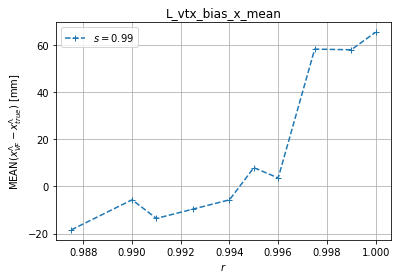

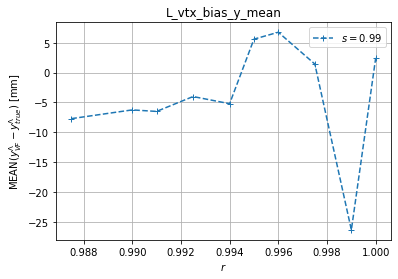

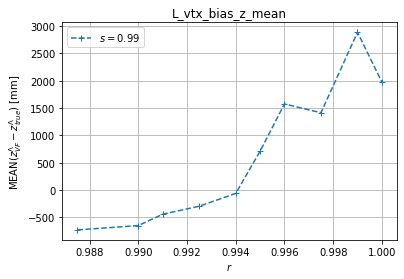

In [10]:
s_to_plot = 0.99

for component in ['x', 'y', 'z']:
    feature_to_plot = 'L_vtx_bias_' + component + '_mean'
    ylabel = "MEAN$(" + component + "^\Lambda_{VF} - " + component + "^\Lambda_{true})$ [mm]"
    fixed_s_plot(s_to_plot, s_r_values_dictionary, feature_to_plot, ylabel, feature_to_plot)

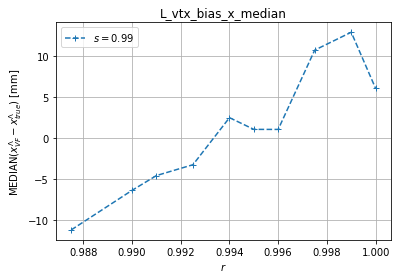

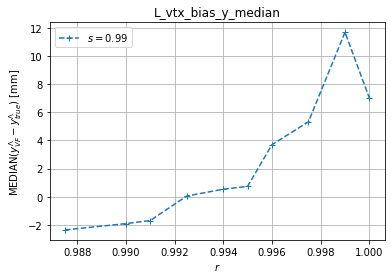

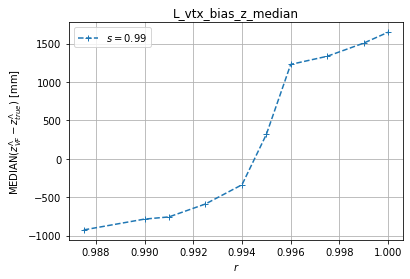

In [11]:
s_to_plot = 0.99

for component in ['x', 'y', 'z']:
    feature_to_plot = 'L_vtx_bias_' + component + '_median'
    ylabel = "MEDIAN$(" + component + "^\Lambda_{VF} - " + component + "^\Lambda_{true})$ [mm]"
    fixed_s_plot(s_to_plot, s_r_values_dictionary, feature_to_plot, ylabel, feature_to_plot)

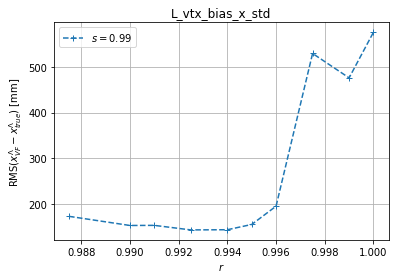

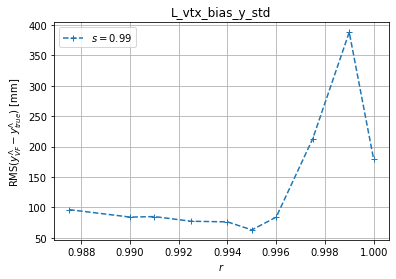

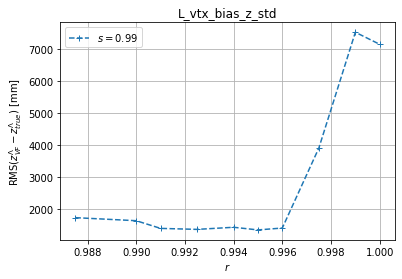

In [12]:
s_to_plot = 0.99

for component in ['x', 'y', 'z']:
    feature_to_plot = 'L_vtx_bias_' + component + '_std'
    ylabel = "RMS$(" + component + "^\Lambda_{VF} - " + component + "^\Lambda_{true})$ [mm]"
    fixed_s_plot(s_to_plot, s_r_values_dictionary, feature_to_plot, ylabel, feature_to_plot)

## Total number of 2D-converged events

In [13]:
for s, r in s_r_values:
    selected_events = (
        (df_events['s'] == s)
        & (df_events['r'] == r)
        & (df_events['status_2D'] == 'Converged2D')
    )
    
    s_r_values_dictionary[s][r]['Converged2D_total'] = sum(selected_events)

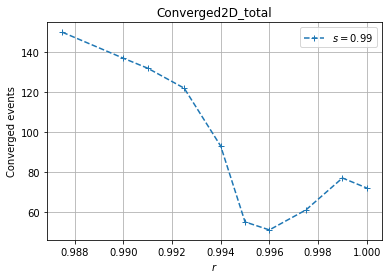

In [14]:
s_to_plot = 0.99

feature_to_plot = 'Converged2D_total'
ylabel = "Converged events"
fixed_s_plot(s_to_plot, s_r_values_dictionary, feature_to_plot, ylabel, feature_to_plot)

## Reduced $\chi^2_\Lambda$

In [15]:
for s, r in s_r_values:
    selected_events = (
        (df_events['s'] == s)
        & (df_events['r'] == r)
        & (df_events['status_2D'] == 'Converged2D')
    )
    
    ## Chi2 mean
    s_r_values_dictionary[s][r]['Lambda_reduced_chi2_mean'] = df_events.loc[selected_events, 'L_VFASPF_CHI2_VDOF'].mean()
    
    ## Chi2 median
    s_r_values_dictionary[s][r]['Lambda_reduced_chi2_median'] = df_events.loc[selected_events, 'L_VFASPF_CHI2_VDOF'].median()
    
    ## Chi2 std
    s_r_values_dictionary[s][r]['Lambda_reduced_chi2_std'] = df_events.loc[selected_events, 'L_VFASPF_CHI2_VDOF'].std()

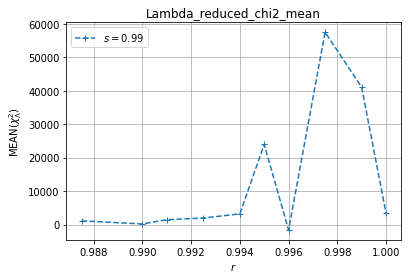

In [16]:
s_to_plot = 0.99

feature_to_plot = 'Lambda_reduced_chi2_mean'
ylabel = "MEAN$(\chi^2_\Lambda)$"
fixed_s_plot(s_to_plot, s_r_values_dictionary, feature_to_plot, ylabel, feature_to_plot)

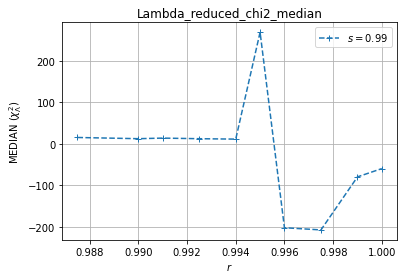

In [17]:
s_to_plot = 0.99

feature_to_plot = 'Lambda_reduced_chi2_median'
ylabel = "MEDIAN $(\chi^2_\Lambda)$"
fixed_s_plot(s_to_plot, s_r_values_dictionary, feature_to_plot, ylabel, feature_to_plot)

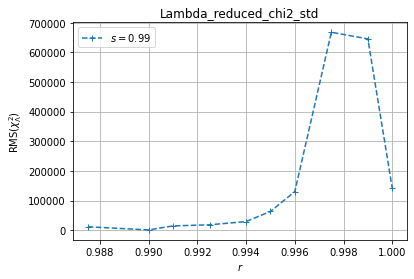

In [18]:
s_to_plot = 0.99

feature_to_plot = 'Lambda_reduced_chi2_std'
ylabel = "RMS$(\chi^2_\Lambda)$"
fixed_s_plot(s_to_plot, s_r_values_dictionary, feature_to_plot, ylabel, feature_to_plot)